# _Flower Classification from Iris Dataset_

### _Importing Necessary Libraries_

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### _Reading Data from IRIS.csv file_

In [2]:
data = pd.read_csv("./DataSets/IRIS.csv")
print(data.sample(6))
print("\nShape: ", data.shape)

     sepal_length  sepal_width  petal_length  petal_width          species
123           6.3          2.7           4.9          1.8   Iris-virginica
127           6.1          3.0           4.9          1.8   Iris-virginica
110           6.5          3.2           5.1          2.0   Iris-virginica
33            5.5          4.2           1.4          0.2      Iris-setosa
69            5.6          2.5           3.9          1.1  Iris-versicolor
109           7.2          3.6           6.1          2.5   Iris-virginica

Shape:  (150, 5)


In [3]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [4]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


### _Visualizing the corr matrix_

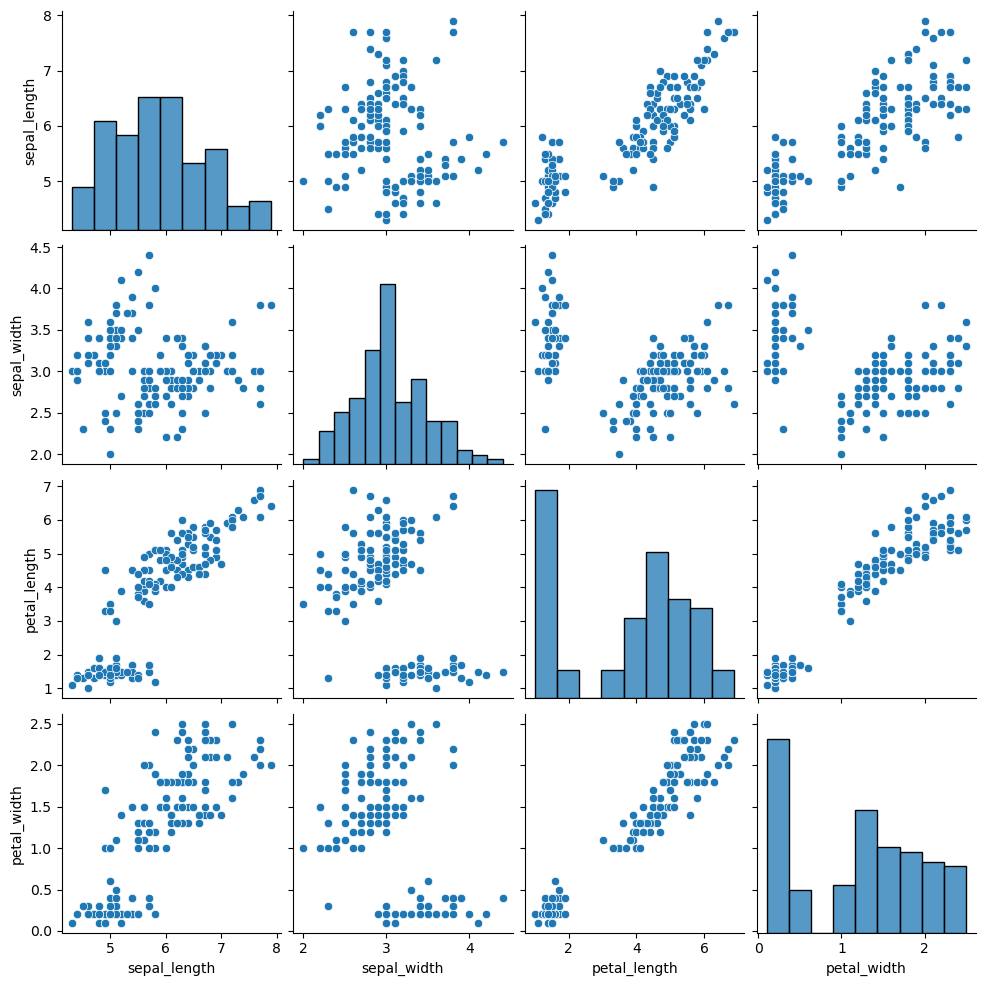

In [5]:
sns.pairplot (data)

### _Feature Engineering_

In [6]:
data['species'] = data['species'].map({'Iris-versicolor': 0, 'Iris-setosa': 1, 'Iris-virginica': 2})
data['species'].value_counts()

1    50
0    50
2    50
Name: species, dtype: int64

In [7]:
X = data.drop(columns="species")
y = data["species"]

### _Importing Models from sklearn library for training_

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
clf = []
clf.append(('NB ', GaussianNB()))
clf.append(('LogReg ', LogisticRegression(random_state=9)))
clf.append(('DT ', DecisionTreeClassifier(random_state = 9)))
clf.append(('KNN ', KNeighborsClassifier()))
clf.append(('SVC', SVC(random_state = 9)))
clf.append(('RFC', RandomForestClassifier(n_estimators=100, random_state=9)))
clf.append(('LDA', LinearDiscriminantAnalysis()))

### _Train and Test_

In [10]:
res = []
for i, j in clf:
  j.fit(X_train, y_train)
  y_pred = j.predict(X_test)
  print(y_pred, ' Accuracy for ',i, ' = ', j.score(X_test, y_test))
  res.append(j.score(X_test, y_test))

[2 0 1 2 1 2 1 0 0 0 2 0 0 0 0 1 0 0 1 1 2 0 1 1 2 1 1 0 0 1 2 0 1 2 2 0 1
 0 0 0 2 1 2 1 1]  Accuracy for  NB   =  1.0
[2 0 1 2 1 2 1 0 0 0 2 0 0 0 0 1 0 0 1 1 2 0 1 1 2 1 1 0 0 1 2 0 1 2 2 0 1
 2 0 0 2 1 2 1 1]  Accuracy for  LogReg   =  0.9777777777777777
[2 0 1 2 1 2 1 0 0 0 2 0 0 0 0 1 0 0 1 1 2 0 1 1 2 1 1 0 0 1 2 0 1 2 2 0 1
 2 0 0 2 1 2 1 1]  Accuracy for  DT   =  0.9777777777777777
[2 0 1 2 1 2 1 0 0 0 2 0 0 0 0 1 0 0 1 1 2 0 1 1 2 1 1 0 0 1 2 0 1 2 2 0 1
 2 0 0 2 1 2 1 1]  Accuracy for  KNN   =  0.9777777777777777
[2 0 1 2 1 2 1 0 0 0 2 0 0 0 0 1 0 0 1 1 2 0 1 1 2 1 1 0 0 1 2 0 1 2 2 0 1
 2 0 0 2 1 2 1 1]  Accuracy for  SVC  =  0.9777777777777777
[2 0 1 2 1 2 1 0 0 0 2 0 0 0 0 1 0 0 1 1 2 0 1 1 2 1 1 0 0 1 2 0 1 2 2 0 1
 2 0 0 2 1 2 1 1]  Accuracy for  RFC  =  0.9777777777777777
[2 0 1 2 1 2 1 0 0 0 2 0 0 0 0 1 0 0 1 1 2 0 1 1 2 1 1 0 0 1 2 0 1 2 2 0 1
 2 0 0 2 1 2 1 1]  Accuracy for  LDA  =  0.9777777777777777


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [11]:
### _Plotting CrossValidation Score Obtained for Each Model_

In [12]:
c1, c2 = zip(*clf)
plt.bar(c1, res, label = "Accuracy from Cross Validation Score")

<BarContainer object of 7 artists>

###  Results
- Gaussian Naive Bayes was able to prdict every species perfectly.